## Introduction to Data Science: Project Data Acquisition and Clean Up

Air Quality data from: https://www.epa.gov/outdoor-air-quality-data

Traffic data from: http://www.udot.utah.gov/main/f?p=100:pg::::1:T,V:3776

In [23]:
import pandas as pd
import matplotlib.pyplot as plt 
%pylab inline
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

# This cell loads in a bunch of data

# This is the 2014 PM2.5 Data
total_data_air_2014 = pd.read_csv('ad_viz_plotval_data_2014.csv')

# This is the 2014 Ozone Data
total_data_ozone_2014 = pd.read_csv('ad_viz_plotval_data_ozone_2014.csv')

# This is the 2014 AQI Data
total_data_aqi_2014 = pd.read_csv('aqidaily2014.csv')
total_data_aqi_2014['Date'] =pd.to_datetime(total_data_aqi_2014.Date)     #converts to datetime format

# This is the 2013 AQI Data
total_data_aqi_2013 = pd.read_csv('aqidaily2013.csv')
total_data_aqi_2013['Date'] =pd.to_datetime(total_data_aqi_2013.Date)     #converts to datetime format

# This is the 2012 AQI Data
total_data_aqi_2012 = pd.read_csv('aqidaily2012.csv')
total_data_aqi_2012['Date'] =pd.to_datetime(total_data_aqi_2012.Date)     #converts to datetime format

# This is the 2011 AQI Data
total_data_aqi_2011 = pd.read_csv('aqidaily2011.csv')
total_data_aqi_2011['Date'] =pd.to_datetime(total_data_aqi_2011.Date)     #converts to datetime format

# This is the 2014 Data for traffic density
total_data_traffic_2014 = pd.read_excel('2014ATRVolComb.xlsx')
total_data_traffic_2014['Date'] =pd.to_datetime(total_data_traffic_2014.Date)     #converts to datetime format

# This is the 2006 to 2015 yearly average traffic
total_data_traffic_10year = pd.read_excel('2006 to 2015 10 year ATR History.xls')

Populating the interactive namespace from numpy and matplotlib


In [24]:
# This code cleans up the 10 year traffic data

# Drop Top rows of dataframe *empty rows
total_data_traffic_10year.drop(total_data_traffic_10year.index[[0,1,2]], inplace=True)

# Rename Columns
total_data_traffic_10year = total_data_traffic_10year.rename(columns={'This file has a page for each listed Automated Traffic Recorder': 'Station', 'Unnamed: 1': 'FC',
                       'Unnamed: 2': 'County','Unnamed: 3': 'Route','Unnamed: 4': 'Mile','Unnamed: 5': 'Location',
                       'Unnamed: 6': '2015','Unnamed: 7': '2014','Unnamed: 8':'2013','Unnamed: 9':'2012','Unnamed: 10':'2011',
                       'Unnamed: 11':'2010','Unnamed: 12':'2009','Unnamed: 13':'2008','Unnamed: 14':'2007','Unnamed: 15':'2006'})

# Drop repetitive rows
total_data_traffic_10year = total_data_traffic_10year.drop(total_data_traffic_10year.index[[0,1]])

# Remove NaN
total_data_traffic_10year = total_data_traffic_10year.dropna(axis=0, inplace=False)

# Change type to INT where appropriate
total_data_traffic_10year['County'] = total_data_traffic_10year['County'].astype(int)

# Filter out the county 35 rows, traffic collection sites within salt lake county
ten_year_mask_one = total_data_traffic_10year['County'] == 35
total_data_traffic_10year = total_data_traffic_10year[ten_year_mask_one]

In [25]:
total_data_traffic_10year

,Station,FC,County,Route,Mile,Location,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
5,301,11,35,080,129,"1 mile East of I 215 Interchange, Parleys Canyon",54371.0,51752.0,49498.0,47162.0,46731.0,46205.0,46246.0,46696.0,51004.0,49150.0
6,302,11,35,015,290,"0.5 mile South of Draper Interchange, Draper",157159.0,176643.0,169715.0,167152.0,163781.0,0.0,0.0,0.0,0.0,0.0
20,317,06,35,210,004.166,"Mouth of Little Cottonwood Canyon, Salt Lake City",6535.0,5948.0,5561.0,5325.0,5403.0,5577.0,5429.0,5479.0,5511.0,5776.0
25,322,16,35,190,002.460,"Mouth of Big Cottonwood Canyon, Salt Lake City",5159.0,4499.0,4170.0,4046.0,3841.0,4082.0,4036.0,4040.0,4252.0,4570.0
28,325,16,35,089,377.45,"1087 South State Street, Salt Lake City",22284.0,21684.0,21828.0,21947.0,21802.0,22057.0,22719.0,23736.0,24352.0,24598.0
31,332,14,35,186,006.186,"950 South Foothill Blvd, Salt Lake City",43234.0,43721.0,44097.0,45340.0,44166.0,44481.0,45584.0,44898.0,45303.0,45276.0
32,333,14,35,071,021.260,"1190 South 700 East, Salt Lake City",39553.0,39436.0,37948.0,37653.0,37352.0,35828.0,35407.0,33683.0,37076.0,37790.0
33,335,16,35,173,008.339,"5400 South 950 West, Salt Lake City",26292.0,27745.0,25870.0,26360.0,27403.0,28240.0,28807.0,28410.0,29777.0,29089.0
34,340,11,35,080,118.42,"1100 West, Salt Lake City - Removed in 1998 -...",65434.0,61635.0,60391.0,60600.0,57951.0,58178.0,56866.0,56610.0,61846.0,58023.0
35,341,11,35,080,123.54,"1 mile East of 300 East Overpass, Salt Lake City",129805.0,124046.0,120879.0,118830.0,115485.0,111411.0,0.0,0.0,0.0,111858.0


In [100]:
# This code will isolate a given traffic monitoring site, enter whichever site point you prefer

# I arbituarily picked site -301 for this!
mask = total_data_traffic_2014['ATR'] == -301
total_data_traffic_2014_new = total_data_traffic_2014[mask]

In [101]:
# This cell splits up and cleans the 2014 PM2.5 Data
#Get the info from site 1
mask_one_2014 = total_data_air_2014['POC']==1                             #this masks data from site 1
airdata_pocone_2014 = total_data_air_2014[mask_one_2014]
airdata_pocone_2014 = airdata_pocone_2014.drop_duplicates(subset='Date', keep='last')  #Remove duplicate dates
airdata_pocone_2014['Date'] =pd.to_datetime(airdata_pocone_2014.Date)     #converts to datetime format
airdata_pocone_2014 = airdata_pocone_2014.sort('Date')                    #sorts according to date
dates_one_2014 = airdata_pocone_2014['Date']                          #this and the line below create dates for plotting           
pm_one_2014 = airdata_pocone_2014['Daily Mean PM2.5 Concentration']   #this isolates the PMC data for plotting

#Get the info from site 2
mask_two_2014 = total_data_air_2014['POC']==2
airdata_poctwo_2014 = total_data_air_2014[mask_two_2014]
dates_two_2014 = airdata_poctwo_2014['Date']
dates_two_2014 = pd.to_datetime(pd.Series(dates_two_2014))
pm_two_2014 = airdata_poctwo_2014['Daily Mean PM2.5 Concentration']

#Get the info from site 3
mask_three_2014 = total_data_air_2014['POC']==3
airdata_pocthree_2014 = total_data_air_2014[mask_three_2014]
dates_three_2014 = airdata_pocthree_2014['Date']
dates_three_2014 = pd.to_datetime(pd.Series(dates_three_2014))
pm_three_2014 = airdata_pocthree_2014['Daily Mean PM2.5 Concentration']

#Get the info from site 4
mask_four_2014 = total_data_air_2014['POC']==4
airdata_pocfour_2014 = total_data_air_2014[mask_four_2014]
dates_four_2014 = airdata_pocfour_2014['Date']                   
dates_four_2014 = pd.to_datetime(pd.Series(dates_four_2014))
pm_four_2014 = airdata_pocfour_2014['Daily Mean PM2.5 Concentration']

#Get the info from site 5
mask_five_2014 = total_data_air_2014['POC']==5
airdata_pocfive_2014 = total_data_air_2014[mask_five_2014]
dates_five_2014 = airdata_pocfive_2014['Date']                   
dates_five_2014 = pd.to_datetime(pd.Series(dates_five_2014))
pm_five_2014 = airdata_pocfive_2014['Daily Mean PM2.5 Concentration']

#Get the info from site 6
mask_six_2014 = total_data_air_2014['POC']==6
airdata_pocsix_2014 = total_data_air_2014[mask_six_2014]
dates_six_2014 = airdata_pocsix_2014['Date']                   
dates_six_2014 = pd.to_datetime(pd.Series(dates_six_2014))
pm_six_2014 = airdata_pocsix_2014['Daily Mean PM2.5 Concentration']

/Users/Mar_ten/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [102]:
# This cell splits up and cleans the Ozone 2014 Data *Site only data from POC 1

#Get the info from site 1
mask_one_2014 = total_data_ozone_2014['POC']==1                             #this masks data from site 1
airdata_ozoneone_2014 = total_data_ozone_2014[mask_one_2014]
airdata_ozoneone_2014 = airdata_ozoneone_2014.drop_duplicates(subset='Date', keep='last')  #Remove duplicate dates
airdata_ozoneone_2014['Date'] =pd.to_datetime(airdata_ozoneone_2014.Date)     #converts to datetime format
airdata_ozoneone_2014 = airdata_ozoneone_2014.sort('Date')                    #sorts according to date
dates_ozoneone_2014 = airdata_ozoneone_2014['Date']                          #this and the line below create dates for plotting           
ozone_one_2014 = airdata_ozoneone_2014['Daily Max 8-hour Ozone Concentration']   #this isolates the PMC data for plotting


/Users/Mar_ten/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [103]:
# This cell cleans up the AQI data

# 2014
dates_aqi_2014 = total_data_aqi_2014['Date']
values_aqi_2014 = total_data_aqi_2014['Overall AQI Value']

# 2013
dates_aqi_2013 = total_data_aqi_2013['Date']
values_aqi_2013 = total_data_aqi_2013['Overall AQI Value']

# 2012
dates_aqi_2012 = total_data_aqi_2012['Date']
values_aqi_2012 = total_data_aqi_2012['Overall AQI Value']

# 2011
dates_aqi_2011 = total_data_aqi_2011['Date']
values_aqi_2011 = total_data_aqi_2011['Overall AQI Value']

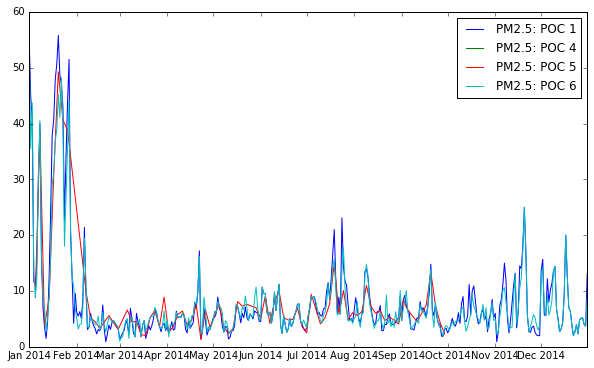

In [104]:

line1 = plt.plot(dates_one_2014,pm_one_2014, label = 'PM2.5: POC 1')
line2 = plt.plot(dates_four_2014,pm_four_2014, label = 'PM2.5: POC 4')
line4 = plt.plot(dates_five_2014,pm_five_2014, label = 'PM2.5: POC 5')
line6 = plt.plot(dates_six_2014,pm_six_2014, label = 'PM2.5: POC 6')
plt.legend(loc='best')

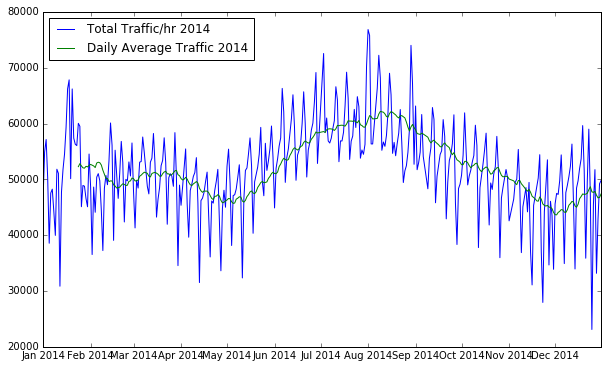

In [105]:
# Traffic in 2014

Total_traffic_2014 = total_data_traffic_2014_new['Total']
Traffic_Dates_2014 = total_data_traffic_2014_new['Date']

line6 = plt.plot(Traffic_Dates_2014,Total_traffic_2014, label = 'Total Traffic/hr 2014')
Total_traffic_2014_rolling = np.round(total_data_traffic_2014_new['Total'].rolling(window = 24, center = False).mean(), 2)
plt.plot(Traffic_Dates_2014,Total_traffic_2014_rolling,label="Daily Average Traffic 2014")
plt.legend(loc='best')


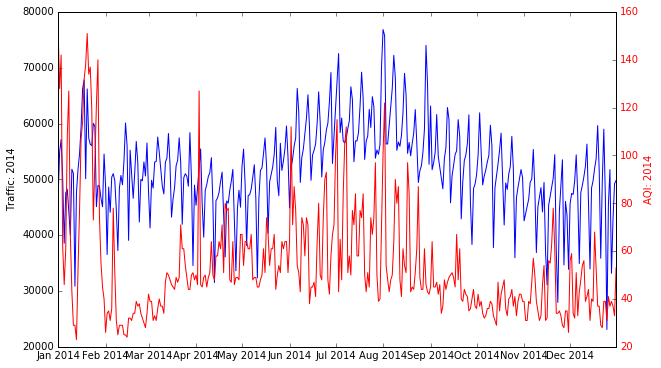

In [106]:
# Plot of both the traffic of 2014 and the aqi from 2014

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(Traffic_Dates_2014,Total_traffic_2014)
ax1.set_ylabel('Traffic: 2014')

ax2 = ax1.twinx()
ax2.plot(dates_aqi_2014, values_aqi_2014, 'r-')
ax2.set_ylabel('AQI: 2014', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
fig = plt.figure()


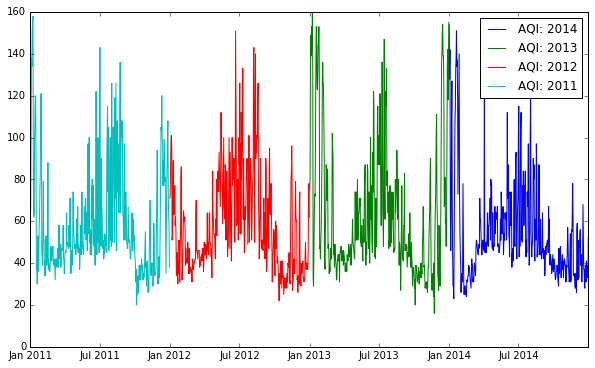

In [107]:
#Plot the aqi from 2011 to 2014

line1 = plt.plot(dates_aqi_2014, values_aqi_2014, label = 'AQI: 2014')
line2 = plt.plot(dates_aqi_2013, values_aqi_2013, label = 'AQI: 2013')
line3 = plt.plot(dates_aqi_2012, values_aqi_2012, label = 'AQI: 2012')
line4 = plt.plot(dates_aqi_2011, values_aqi_2011, label = 'AQI: 2011')
plt.legend(loc='best')

In [108]:
values_aqi_2014_rolling = np.round(total_data_aqi_2014['Overall AQI Value'].rolling(window = 24, center = False).mean(), 2)

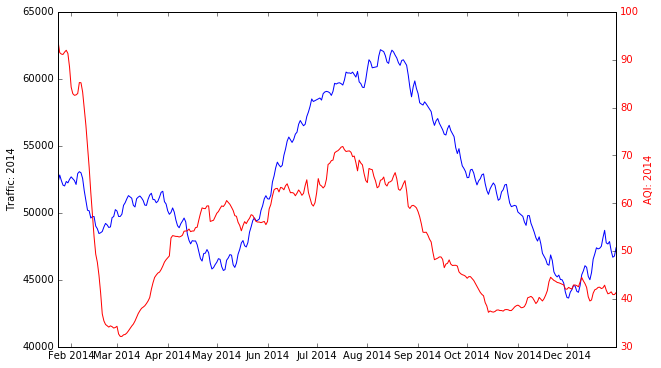

In [109]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(Traffic_Dates_2014,Total_traffic_2014_rolling)
ax1.set_ylabel('Traffic: 2014')

ax2 = ax1.twinx()
ax2.plot(dates_aqi_2014, values_aqi_2014_rolling, 'r-')
ax2.set_ylabel('AQI: 2014', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
fig = plt.figure()


In [110]:
total_data_aqi_2014.head()

,Date,Main Pollutant,Overall AQI Value,CO,SO2,Ozone,PM10,NO2,PM25
0,2014-01-01,PM2.5,154,13,6,18,.,.,154
1,2014-01-02,PM2.5,128,15,3,12,51,.,128
2,2014-01-03,PM2.5,142,22,3,5,.,.,142
3,2014-01-04,PM2.5,62,9,0,23,23,.,62
4,2014-01-05,PM2.5,46,7,0,31,21,.,46


In [113]:
# In this code  a date frame for good air days and bad air days are created

Hight_AQI = 100
# mask for  days above an unhealty Aqi

Bad_air_mask = total_data_aqi_2014["Overall AQI Value"]>150
Bad_air_df = total_data_aqi_2014[Bad_air_mask]
Good_air_mask = total_data_aqi_2014["Overall AQI Value"]<50
Good_air_df = total_data_aqi_2014[Good_air_mask]


Bad_air_date = Bad_air_df["Date"]
Good_air_date = Good_air_df["Date"]
Bad_air_traffic_mask =total_data_traffic_2014_new.isin({"Date":Bad_air_date})
Bad_air_traffic_df = total_data_traffic_2014_new[Bad_air_traffic_mask["Date"]]
Good_air_traffic_mask =total_data_traffic_2014_new.isin({"Date":Good_air_date})
Good_air_traffic_df = total_data_traffic_2014_new[Good_air_traffic_mask["Date"]]
Bad_air_traffic_average = np.mean(Bad_air_traffic_df["Total"])
Good_air_traffic_average = np.mean(Good_air_traffic_df["Total"])
print("Average daily traffic on good air days: " +str(Good_air_traffic_average))
print("Average daily traffic on bad air days: " +str(Bad_air_traffic_average))



Average daily traffic on good air days: 48998.12195121951
Average daily traffic on bad air days: 56361.5
Hahahahahha  this is funny 
